# NIRS Indexer Comprehensive Demonstration

This notebook demonstrates the comprehensive usage of the NIRS Indexer class for managing sample indices in Near-Infrared Spectroscopy (NIRS) machine learning pipelines.

## Table of Contents
1. [Basic Usage](#basic-usage)
2. [Sample Management](#sample-management)
3. [Data Augmentation](#data-augmentation)
4. [Filtering and Querying](#filtering-and-querying)
5. [ML Pipeline Integration](#ml-pipeline-integration)
6. [Advanced Scenarios](#advanced-scenarios)
7. [Performance Analysis](#performance-analysis)

In [39]:
# Import required libraries
import sys
sys.path.append('../')  # Add parent directory to path

from nirs4all.dataset.indexer import Indexer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Basic Usage {#basic-usage}

Let's start with the basic functionality of the Indexer class.

In [40]:
# Create a new indexer instance
indexer = Indexer()

print("Empty Indexer:")
print(f"Next row index: {indexer.next_row_index()}")
print(f"Next sample index: {indexer.next_sample_index()}")
print(f"DataFrame shape: {indexer.df.shape}")
print(f"Default values: {indexer.default_values}")

Empty Indexer:
Next row index: 0
Next sample index: 0
DataFrame shape: (0, 8)
Default values: {'partition': 'train', 'group': 0, 'branch': 0, 'processings': ['raw']}


In [41]:
# Add some basic samples
train_samples = indexer.add_samples(50, partition="train")
test_samples = indexer.add_samples(20, partition="test")
val_samples = indexer.add_samples(15, partition="val")

print(f"Added {len(train_samples)} training samples: {train_samples[:5]}...")
print(f"Added {len(test_samples)} test samples: {test_samples[:5]}...")
print(f"Added {len(val_samples)} validation samples: {val_samples[:5]}...")

print(f"\nTotal samples in indexer: {len(indexer.df)}")
print("\nFirst 5 rows:")
print(indexer.df.head(5))

print("\nLast 5 rows:")
print(indexer.df.tail(5))

Added 50 training samples: [0, 1, 2, 3, 4]...
Added 20 test samples: [50, 51, 52, 53, 54]...
Added 15 validation samples: [70, 71, 72, 73, 74]...

Total samples in indexer: 85

First 5 rows:
shape: (5, 8)
┌─────┬────────┬────────┬───────────┬───────┬────────┬─────────────┬──────────────┐
│ row ┆ sample ┆ origin ┆ partition ┆ group ┆ branch ┆ processings ┆ augmentation │
│ --- ┆ ---    ┆ ---    ┆ ---       ┆ ---   ┆ ---    ┆ ---         ┆ ---          │
│ i32 ┆ i32    ┆ i32    ┆ cat       ┆ i8    ┆ i8     ┆ cat         ┆ cat          │
╞═════╪════════╪════════╪═══════════╪═══════╪════════╪═════════════╪══════════════╡
│ 0   ┆ 0      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw']     ┆ null         │
│ 1   ┆ 1      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw']     ┆ null         │
│ 2   ┆ 2      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw']     ┆ null         │
│ 3   ┆ 3      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw']     ┆ null         │
│ 4   ┆ 4      ┆ null   ┆ train     ┆ 0

sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


## 2. Sample Management {#sample-management}

Demonstrate advanced sample management with different groups, branches, and processing configurations.

In [42]:
# Create a new indexer for this section
indexer_advanced = Indexer()

# Add samples with different groups (representing different sample types)
# Group 0: Organic samples
organic_samples = indexer_advanced.add_samples(
    count=30,
    partition="train",
    group=0,
    processings=["raw", "savgol", "msc"]
)

# Group 1: Synthetic samples
synthetic_samples = indexer_advanced.add_samples(
    count=25,
    partition="train",
    group=1,
    branch=1,
    processings=["raw", "snv", "detrend"]
)

# Group 2: Mixed samples with individual processing
mixed_samples = indexer_advanced.add_samples(
    count=3,
    partition="test",
    group=2,
    branch=[0, 1, 2],  # Different branches per sample
    processings=[
        ["raw"],
        ["raw", "savgol"],
        ["raw", "msc", "snv"]
    ]
)

print(f"Organic samples (group 0): {len(organic_samples)} samples")
print(f"Synthetic samples (group 1): {len(synthetic_samples)} samples")
print(f"Mixed samples (group 2): {len(mixed_samples)} samples")

print("\nMixed samples details:")
mixed_df = indexer_advanced.df.filter(indexer_advanced.df["group"] == 2)
print(mixed_df)

Organic samples (group 0): 30 samples
Synthetic samples (group 1): 25 samples
Mixed samples (group 2): 3 samples

Mixed samples details:
shape: (3, 8)
┌─────┬────────┬────────┬───────────┬───────┬────────┬───────────────────────┬──────────────┐
│ row ┆ sample ┆ origin ┆ partition ┆ group ┆ branch ┆ processings           ┆ augmentation │
│ --- ┆ ---    ┆ ---    ┆ ---       ┆ ---   ┆ ---    ┆ ---                   ┆ ---          │
│ i32 ┆ i32    ┆ i32    ┆ cat       ┆ i8    ┆ i8     ┆ cat                   ┆ cat          │
╞═════╪════════╪════════╪═══════════╪═══════╪════════╪═══════════════════════╪══════════════╡
│ 55  ┆ 55     ┆ null   ┆ test      ┆ 2     ┆ 0      ┆ ['raw']               ┆ null         │
│ 56  ┆ 56     ┆ null   ┆ test      ┆ 2     ┆ 1      ┆ ['raw', 'savgol']     ┆ null         │
│ 57  ┆ 57     ┆ null   ┆ test      ┆ 2     ┆ 2      ┆ ['raw', 'msc', 'snv'] ┆ null         │
└─────┴────────┴────────┴───────────┴───────┴────────┴───────────────────────┴──────────────┘


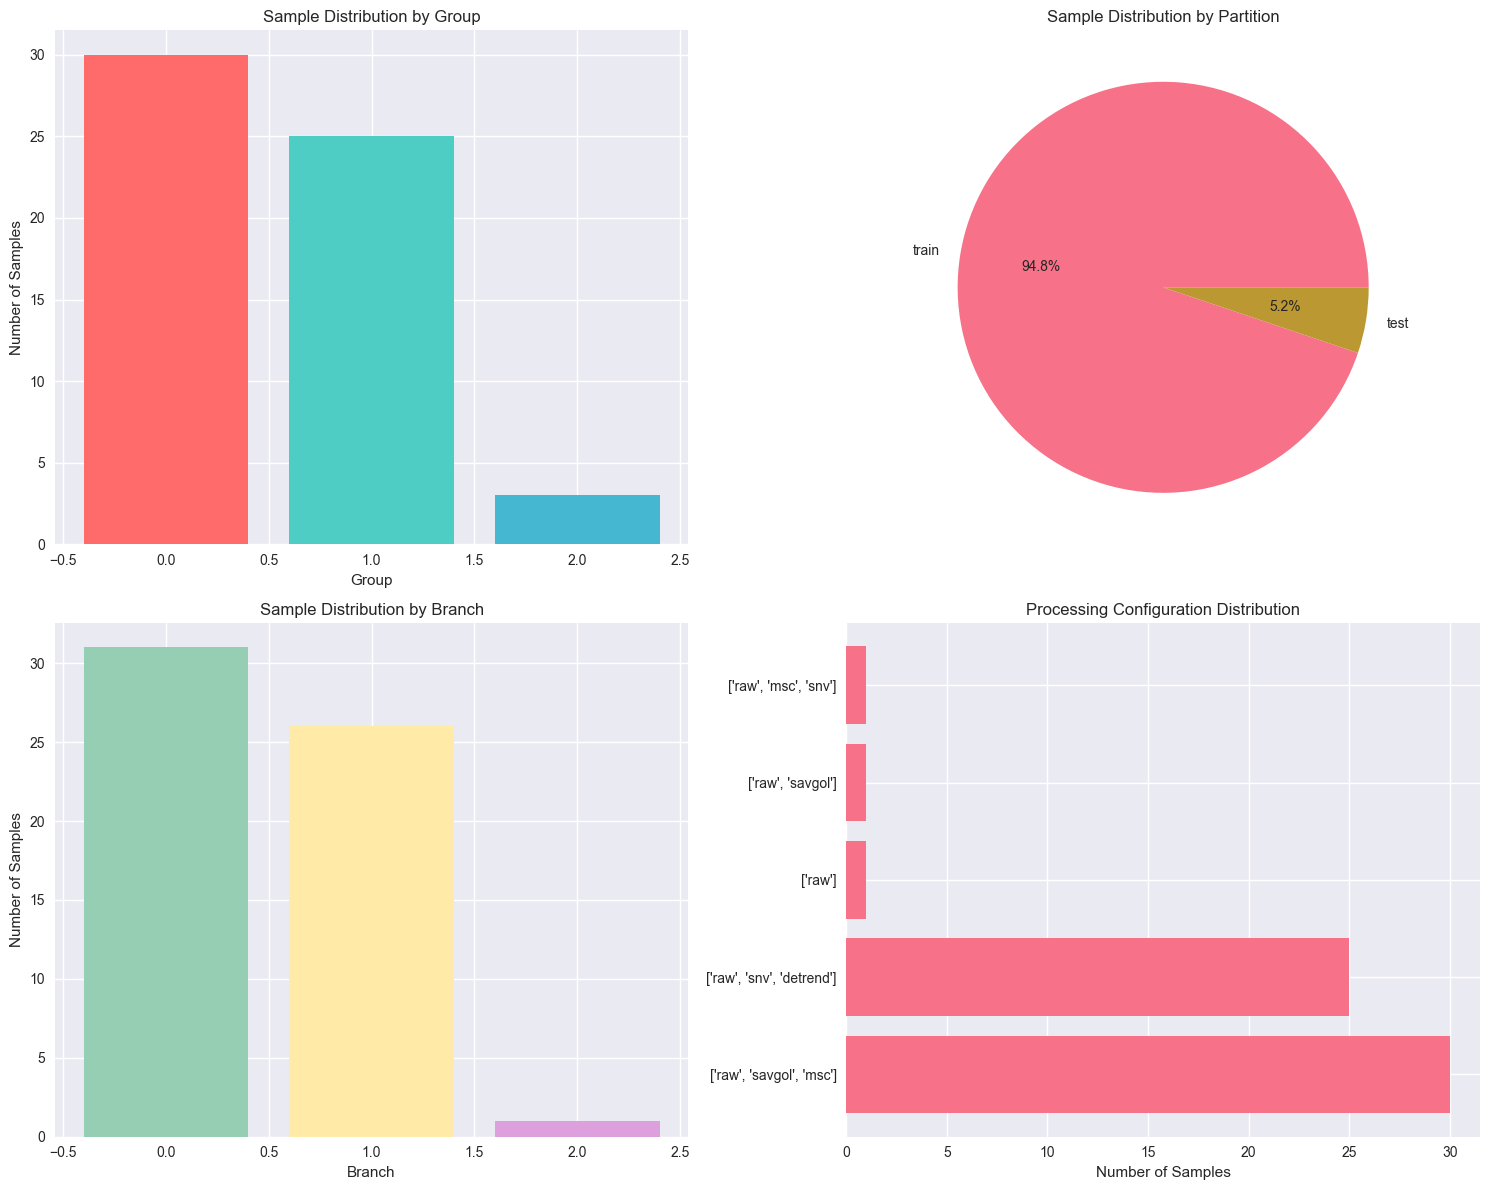

In [43]:
# Visualize the sample distribution
df_pandas = indexer_advanced.df.to_pandas()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Group distribution
group_counts = df_pandas['group'].value_counts().sort_index()
axes[0,0].bar(group_counts.index, group_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,0].set_title('Sample Distribution by Group')
axes[0,0].set_xlabel('Group')
axes[0,0].set_ylabel('Number of Samples')

# Partition distribution
partition_counts = df_pandas['partition'].value_counts()
axes[0,1].pie(partition_counts.values, labels=partition_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Sample Distribution by Partition')

# Branch distribution
branch_counts = df_pandas['branch'].value_counts().sort_index()
axes[1,0].bar(branch_counts.index, branch_counts.values, color=['#96CEB4', '#FFEAA7', '#DDA0DD'])
axes[1,0].set_title('Sample Distribution by Branch')
axes[1,0].set_xlabel('Branch')
axes[1,0].set_ylabel('Number of Samples')

# Processing types
processing_counts = Counter(df_pandas['processings'])
axes[1,1].barh(list(processing_counts.keys()), list(processing_counts.values()))
axes[1,1].set_title('Processing Configuration Distribution')
axes[1,1].set_xlabel('Number of Samples')

plt.tight_layout()
plt.show()

## 3. Data Augmentation {#data-augmentation}

Demonstrate the data augmentation capabilities using the `augment_rows` method.

In [44]:
# Create a new indexer for augmentation demo
aug_indexer = Indexer()

# Add original samples with different characteristics
original_samples = []
sample_types = [
    {"count": 10, "group": 0, "processings": ["raw", "savgol"]},
    {"count": 8, "group": 1, "processings": ["raw", "msc"]},
    {"count": 5, "group": 2, "processings": ["raw", "snv", "detrend"]}
]

for i, sample_type in enumerate(sample_types):
    samples = aug_indexer.add_samples(
        count=sample_type["count"],
        partition="train",
        group=sample_type["group"],
        processings=sample_type["processings"]
    )
    original_samples.extend(samples)
    print(f"Added {sample_type['count']} samples of type {i} (group {sample_type['group']})")

print(f"\nTotal original samples: {len(original_samples)}")
print(f"Original samples: {original_samples}")

Added 10 samples of type 0 (group 0)
Added 8 samples of type 1 (group 1)
Added 5 samples of type 2 (group 2)

Total original samples: 23
Original samples: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


In [45]:
# Perform data augmentation with different strategies

# 1. Augment all samples with rotation
rotation_samples = aug_indexer.augment_rows(original_samples, 1, "rotation")
print(f"Created {len(rotation_samples)} rotation augmentations")

# 2. Augment only group 0 samples with noise (2 augmentations each)
group_0_samples = aug_indexer.x_indices({"group": 0, "augmentation": None})
noise_samples = aug_indexer.augment_rows(group_0_samples.tolist(), 2, "noise")
print(f"Created {len(noise_samples)} noise augmentations for group 0")

# 3. Selective augmentation with different counts per sample
selected_samples = [0, 5, 10]  # Select specific samples
selective_counts = [3, 1, 2]   # Different augmentation counts
selective_samples = aug_indexer.augment_rows(selected_samples, selective_counts, "selective")
print(f"Created {len(selective_samples)} selective augmentations")

print(f"\nTotal samples after augmentation: {len(aug_indexer.df)}")

Created 23 rotation augmentations
Created 20 noise augmentations for group 0
Created 6 selective augmentations

Total samples after augmentation: 72


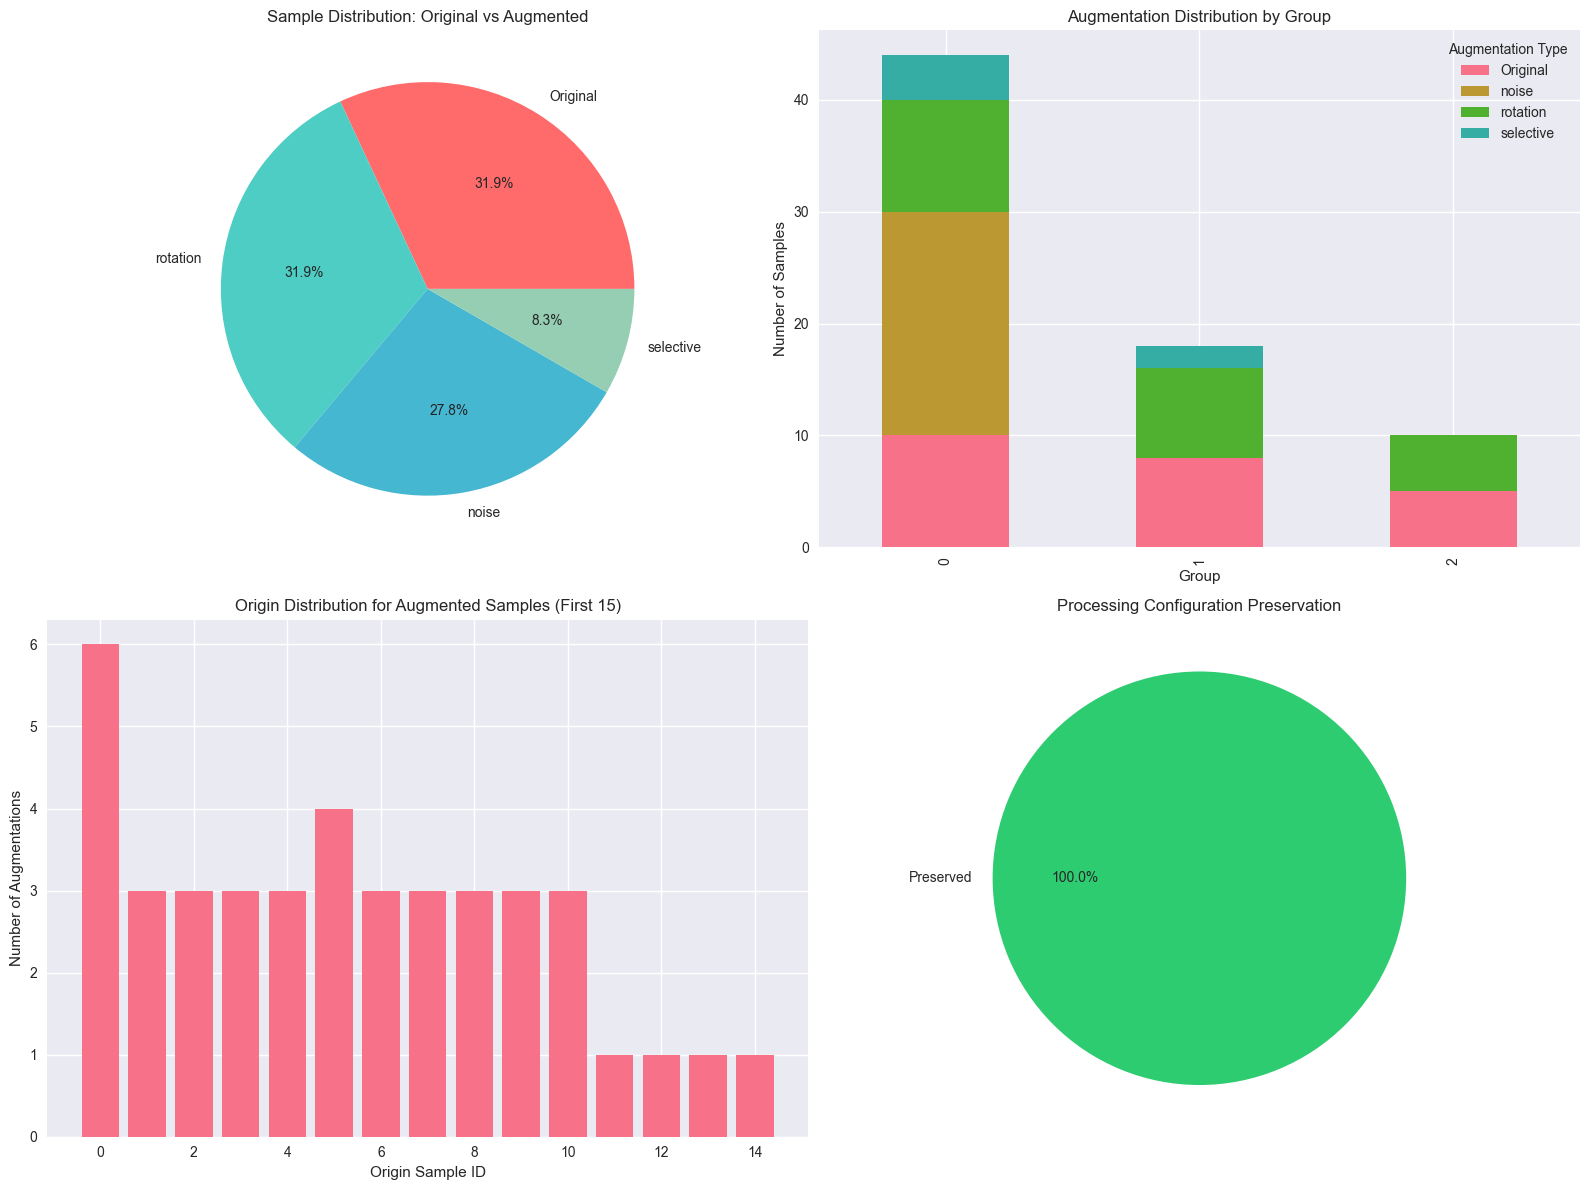

Processing configurations are perfectly preserved in augmented samples


In [46]:
# Visualize augmentation results
aug_df = aug_indexer.df.to_pandas()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original vs Augmented samples - handle categorical column properly
aug_df_copy = aug_df.copy()
aug_df_copy['augmentation'] = aug_df_copy['augmentation'].astype('object')  # Convert to object first
aug_counts = aug_df_copy['augmentation'].fillna('Original').value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
wedges, texts, autotexts = axes[0,0].pie(aug_counts.values, labels=aug_counts.index,
                                         autopct='%1.1f%%', colors=colors)
axes[0,0].set_title('Sample Distribution: Original vs Augmented')

# Augmentation by group - handle categorical column properly
aug_df_copy['augmentation_str'] = aug_df_copy['augmentation'].fillna('Original')
aug_group_crosstab = pd.crosstab(aug_df_copy['group'], aug_df_copy['augmentation_str'])
aug_group_crosstab.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Augmentation Distribution by Group')
axes[0,1].set_xlabel('Group')
axes[0,1].set_ylabel('Number of Samples')
axes[0,1].legend(title='Augmentation Type')

# Origin mapping for augmented samples
augmented_only = aug_df_copy[aug_df_copy['augmentation'].notna()]
origin_counts = augmented_only['origin'].value_counts().sort_index()
axes[1,0].bar(origin_counts.index[:15], origin_counts.values[:15])  # Show first 15
axes[1,0].set_title('Origin Distribution for Augmented Samples (First 15)')
axes[1,0].set_xlabel('Origin Sample ID')
axes[1,0].set_ylabel('Number of Augmentations')

# Processing preservation in augmented samples
processing_comparison = []
for _, row in augmented_only.iterrows():
    original_processing = aug_df_copy[aug_df_copy['sample'] == row['origin']]['processings'].iloc[0]
    processing_comparison.append({
        'augmented_id': row['sample'],
        'original_processing': original_processing,
        'augmented_processing': row['processings'],
        'preserved': original_processing == row['processings']
    })

preservation_counts = pd.Series([item['preserved'] for item in processing_comparison]).value_counts()

# Fix pie chart labels to match the actual data
labels = []
for value in preservation_counts.index:
    if value:
        labels.append('Preserved')
    else:
        labels.append('Modified')

axes[1,1].pie(preservation_counts.values, labels=labels,
              autopct='%1.1f%%', colors=['#2ECC71', '#E74C3C'])
axes[1,1].set_title('Processing Configuration Preservation')

plt.tight_layout()
plt.show()

print(f"Processing configurations are {'perfectly' if all(item['preserved'] for item in processing_comparison) else 'not perfectly'} preserved in augmented samples")

## 4. Filtering and Querying {#filtering-and-querying}

Demonstrate the powerful filtering and querying capabilities of the Indexer.

In [47]:
# Use the augmented indexer from the previous section
print("Available filtering options:")
print(f"Groups: {sorted(aug_indexer.df['group'].unique().to_list())}")
print(f"Partitions: {aug_indexer.df['partition'].unique().to_list()}")
print(f"Branches: {sorted(aug_indexer.df['branch'].unique().to_list())}")
print(f"Augmentation types: {[x for x in aug_indexer.df['augmentation'].unique().to_list() if x is not None]}")
print(f"Processing types: {aug_indexer.df['processings'].unique().to_list()[:5]}...")  # Show first 5

Available filtering options:
Groups: [0, 1, 2]
Partitions: ['train']
Branches: [0]
Augmentation types: ['rotation', 'noise', 'selective']
Processing types: ["['raw', 'savgol']", "['raw', 'msc']", "['raw', 'snv', 'detrend']"]...


In [48]:
# Demonstrate various filtering scenarios

# 1. Get all training samples
train_x = aug_indexer.x_indices({"partition": "train"})
train_y = aug_indexer.y_indices({"partition": "train"})
print(f"Training samples: {len(train_x)} X indices, {len(train_y)} Y indices")

# 2. Get only original samples (no augmentation)
original_x = aug_indexer.x_indices({"augmentation": None})
original_y = aug_indexer.y_indices({"augmentation": None})
print(f"Original samples: {len(original_x)} X indices, {len(original_y)} Y indices")

# 3. Get samples from specific group with specific augmentation
group0_noise = aug_indexer.x_indices({"group": 0, "augmentation": "noise"})
print(f"Group 0 with noise augmentation: {len(group0_noise)} samples")
print(f"Sample IDs: {group0_noise.tolist()[:10]}...")  # Show first 10

# 4. Get samples with multiple criteria
complex_filter = aug_indexer.x_indices({
    "partition": "train",
    "group": [0, 1],  # Multiple groups
    "augmentation": ["rotation", None]  # Original and rotation samples
})
print(f"Complex filter (train, group 0&1, original+rotation): {len(complex_filter)} samples")

# 5. Demonstrate Y indices for augmented samples
rotation_x = aug_indexer.x_indices({"augmentation": "rotation"})
rotation_y = aug_indexer.y_indices({"augmentation": "rotation"})
print(f"\nRotation augmentation:")
print(f"X indices (augmented sample IDs): {rotation_x.tolist()[:10]}...")
print(f"Y indices (original sample IDs): {rotation_y.tolist()[:10]}...")

Training samples: 72 X indices, 72 Y indices
Original samples: 23 X indices, 23 Y indices
Group 0 with noise augmentation: 20 samples
Sample IDs: [46, 47, 48, 49, 50, 51, 52, 53, 54, 55]...
Complex filter (train, group 0&1, original+rotation): 18 samples

Rotation augmentation:
X indices (augmented sample IDs): [23, 24, 25, 26, 27, 28, 29, 30, 31, 32]...
Y indices (original sample IDs): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...


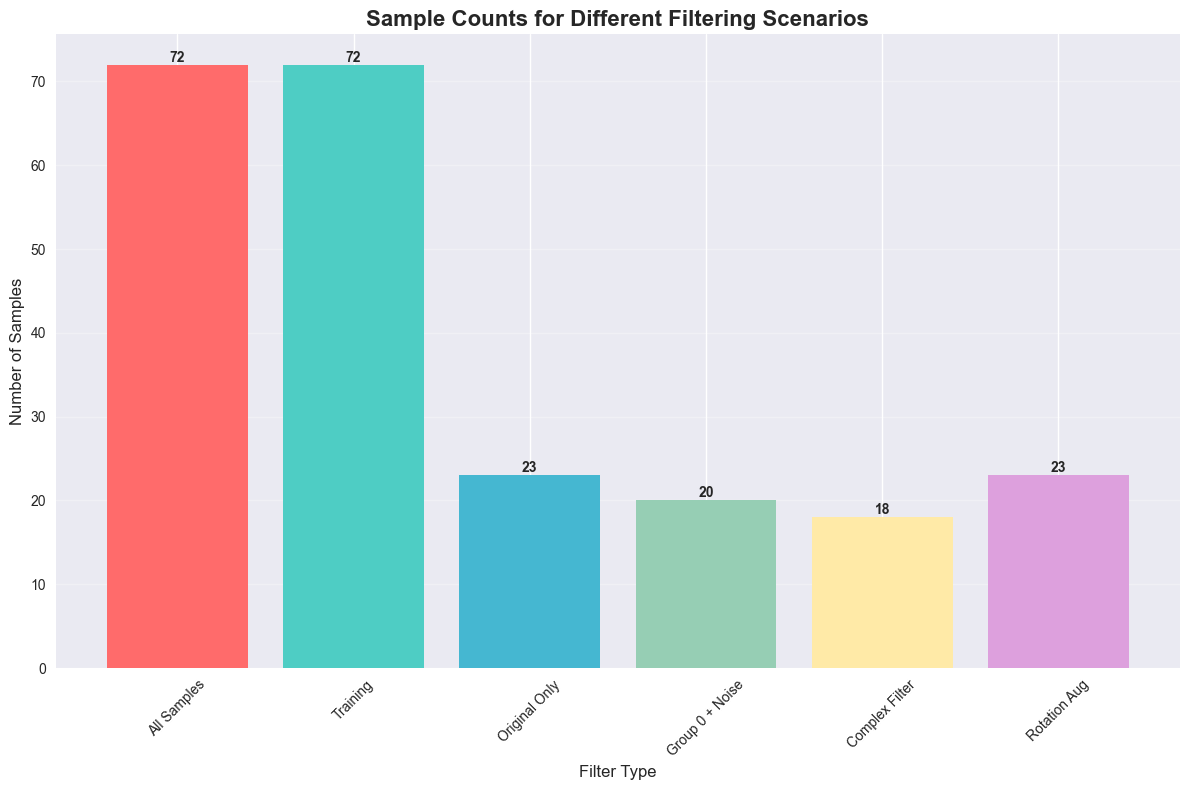

In [49]:
# Visualize filtering results
filters_results = {
    'All Samples': len(aug_indexer.df),
    'Training': len(train_x),
    'Original Only': len(original_x),
    'Group 0 + Noise': len(group0_noise),
    'Complex Filter': len(complex_filter),
    'Rotation Aug': len(rotation_x)
}

plt.figure(figsize=(12, 8))
bars = plt.bar(filters_results.keys(), filters_results.values(),
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.title('Sample Counts for Different Filtering Scenarios', fontsize=16, fontweight='bold')
plt.xlabel('Filter Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. ML Pipeline Integration {#ml-pipeline-integration}

Show how the Indexer integrates with a typical machine learning pipeline.

In [50]:
# Simulate a complete ML pipeline workflow
class NIRSMLPipeline:
    def __init__(self, indexer):
        self.indexer = indexer
        self.data_cache = {}  # Simulate data storage

    def generate_synthetic_spectra(self, sample_ids, n_wavelengths=1000):
        """Simulate NIRS spectra generation based on sample properties"""
        spectra = {}
        for sample_id in sample_ids:
            # Get sample metadata
            sample_info = self.indexer.df.filter(
                self.indexer.df['sample'] == sample_id
            ).row(0, named=True)

            # Generate base spectrum based on group
            base_freq = 1 + sample_info['group'] * 0.5
            wavelengths = np.linspace(1000, 2500, n_wavelengths)
            spectrum = np.sin(wavelengths * base_freq / 1000) + np.random.normal(0, 0.1, n_wavelengths)

            # Apply processing effects
            processing = sample_info['processings']
            if 'savgol' in processing:
                spectrum = np.convolve(spectrum, np.ones(5)/5, mode='same')  # Simple smoothing
            if 'msc' in processing:
                spectrum = spectrum / np.mean(spectrum)  # Normalize

            spectra[sample_id] = spectrum

        return spectra

    def get_training_data(self):
        """Get training data using indexer filters"""
        train_x = self.indexer.x_indices({"partition": "train"})
        train_y = self.indexer.y_indices({"partition": "train"})

        X_spectra = self.generate_synthetic_spectra(train_x)
        X = np.array(list(X_spectra.values()))
        y = train_y  # In real scenario, this would be actual target values

        return X, y

    def get_validation_data(self, augmentation_type=None):
        """Get validation data, optionally including augmented samples"""
        val_filter = {"partition": "train"}  # We'll use train partition for demo
        if augmentation_type:
            val_filter["augmentation"] = augmentation_type

        val_x = self.indexer.x_indices(val_filter)
        val_y = self.indexer.y_indices(val_filter)

        X_spectra = self.generate_synthetic_spectra(val_x)
        X = np.array(list(X_spectra.values()))
        y = val_y

        return X, y

    def analyze_data_distribution(self):
        """Analyze the distribution of data across different categories"""
        df = self.indexer.df.to_pandas()

        analysis = {
            'total_samples': len(df),
            'original_samples': len(df[df['augmentation'].isna()]),
            'augmented_samples': len(df[df['augmentation'].notna()]),
            'partitions': df['partition'].value_counts().to_dict(),
            'groups': df['group'].value_counts().to_dict(),
            'augmentation_types': df['augmentation'].value_counts().to_dict()
        }

        return analysis

# Create pipeline instance
pipeline = NIRSMLPipeline(aug_indexer)

# Analyze data distribution
analysis = pipeline.analyze_data_distribution()
print("Pipeline Data Analysis:")
print(f"Total samples: {analysis['total_samples']}")
print(f"Original samples: {analysis['original_samples']}")
print(f"Augmented samples: {analysis['augmented_samples']}")
print(f"Augmentation ratio: {analysis['augmented_samples']/analysis['original_samples']:.2f}x")
print(f"\nPartition distribution: {analysis['partitions']}")
print(f"Group distribution: {analysis['groups']}")
print(f"Augmentation types: {analysis['augmentation_types']}")

Pipeline Data Analysis:
Total samples: 72
Original samples: 23
Augmented samples: 49
Augmentation ratio: 2.13x

Partition distribution: {'train': 72}
Group distribution: {0: 44, 1: 18, 2: 10}
Augmentation types: {'rotation': 23, 'noise': 20, 'selective': 6}


In [51]:
# Generate and visualize training data
X_train, y_train = pipeline.get_training_data()
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")

# Get different types of validation data
X_val_original, y_val_original = pipeline.get_validation_data(augmentation_type=None)
X_val_rotation, y_val_rotation = pipeline.get_validation_data(augmentation_type="rotation")
X_val_noise, y_val_noise = pipeline.get_validation_data(augmentation_type="noise")

print(f"\nValidation data shapes:")
print(f"Original: {X_val_original.shape}")
print(f"Rotation augmented: {X_val_rotation.shape}")
print(f"Noise augmented: {X_val_noise.shape}")

Training data shape: (72, 1000)
Training labels shape: (72,)

Validation data shapes:
Original: (72, 1000)
Rotation augmented: (23, 1000)
Noise augmented: (20, 1000)


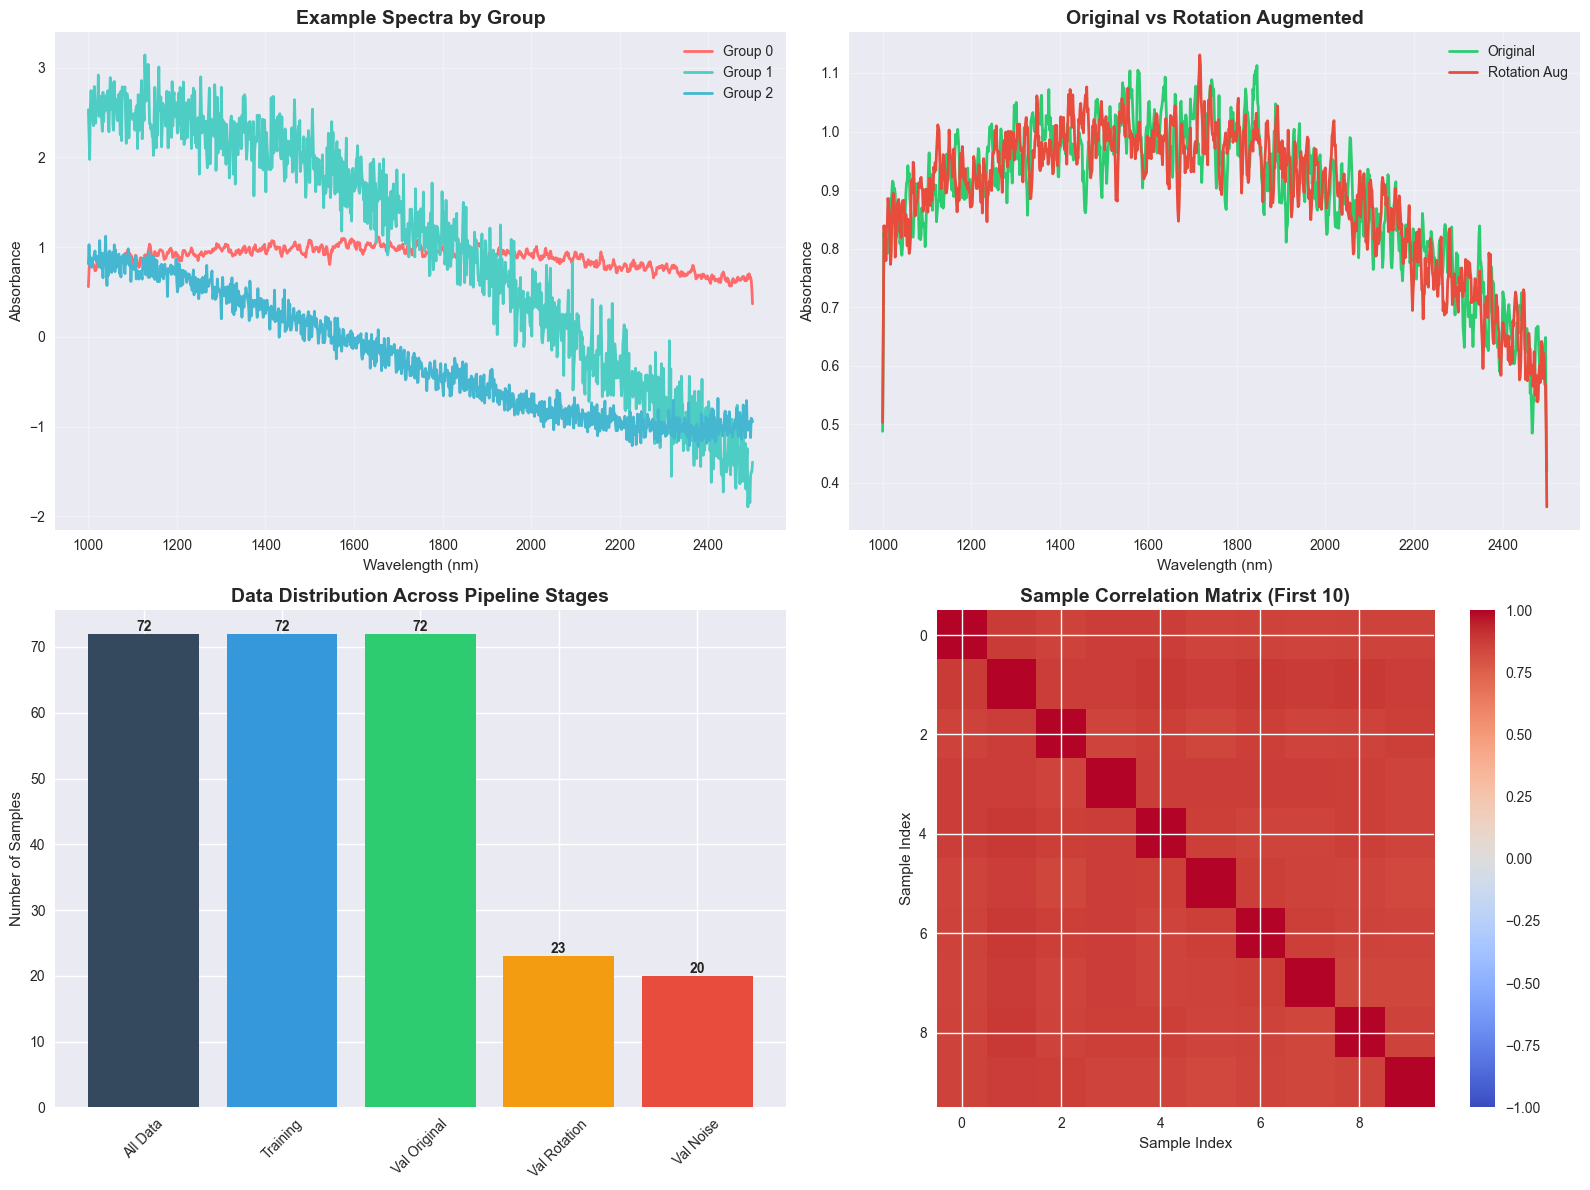

In [52]:
# Visualize some example spectra
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
wavelengths = np.linspace(1000, 2500, 1000)

# Plot spectra from different groups
group_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, group in enumerate([0, 1, 2]):
    group_indices = aug_indexer.x_indices({"group": group, "augmentation": None})
    if len(group_indices) > 0:
        sample_spectra = pipeline.generate_synthetic_spectra([group_indices[0]])
        axes[0,0].plot(wavelengths, list(sample_spectra.values())[0],
                      label=f'Group {group}', color=group_colors[i], linewidth=2)

axes[0,0].set_title('Example Spectra by Group', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Wavelength (nm)')
axes[0,0].set_ylabel('Absorbance')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Plot original vs augmented spectra
sample_id = 0
original_spectrum = pipeline.generate_synthetic_spectra([sample_id])[sample_id]
rotation_indices = aug_indexer.x_indices({"origin": sample_id, "augmentation": "rotation"})
if len(rotation_indices) > 0:
    rotation_spectrum = pipeline.generate_synthetic_spectra([rotation_indices[0]])[rotation_indices[0]]
    axes[0,1].plot(wavelengths, original_spectrum, label='Original', linewidth=2, color='#2ECC71')
    axes[0,1].plot(wavelengths, rotation_spectrum, label='Rotation Aug', linewidth=2, color='#E74C3C')
    axes[0,1].set_title('Original vs Rotation Augmented', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Wavelength (nm)')
    axes[0,1].set_ylabel('Absorbance')
    axes[0,1].legend()
    axes[0,1].grid(alpha=0.3)

# Show data distribution across pipeline stages
pipeline_data = {
    'All Data': len(aug_indexer.df),
    'Training': len(X_train),
    'Val Original': len(X_val_original),
    'Val Rotation': len(X_val_rotation),
    'Val Noise': len(X_val_noise)
}

bars = axes[1,0].bar(pipeline_data.keys(), pipeline_data.values(),
                     color=['#34495E', '#3498DB', '#2ECC71', '#F39C12', '#E74C3C'])
axes[1,0].set_title('Data Distribution Across Pipeline Stages', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Number of Samples')
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Show sample correlation matrix (simplified)
correlation_data = np.corrcoef(X_train[:10])  # Use first 10 samples for demo
im = axes[1,1].imshow(correlation_data, cmap='coolwarm', vmin=-1, vmax=1)
axes[1,1].set_title('Sample Correlation Matrix (First 10)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Sample Index')
axes[1,1].set_ylabel('Sample Index')
plt.colorbar(im, ax=axes[1,1])

plt.tight_layout()
plt.show()

## 6. Advanced Scenarios {#advanced-scenarios}

Demonstrate advanced usage patterns and edge cases.

=== Dynamic Sample Addition Scenario ===
Initial training set: 20 samples
Identified hard examples: [0, 5, 12]
Added 9 targeted augmentations
Added 10 validation samples


sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


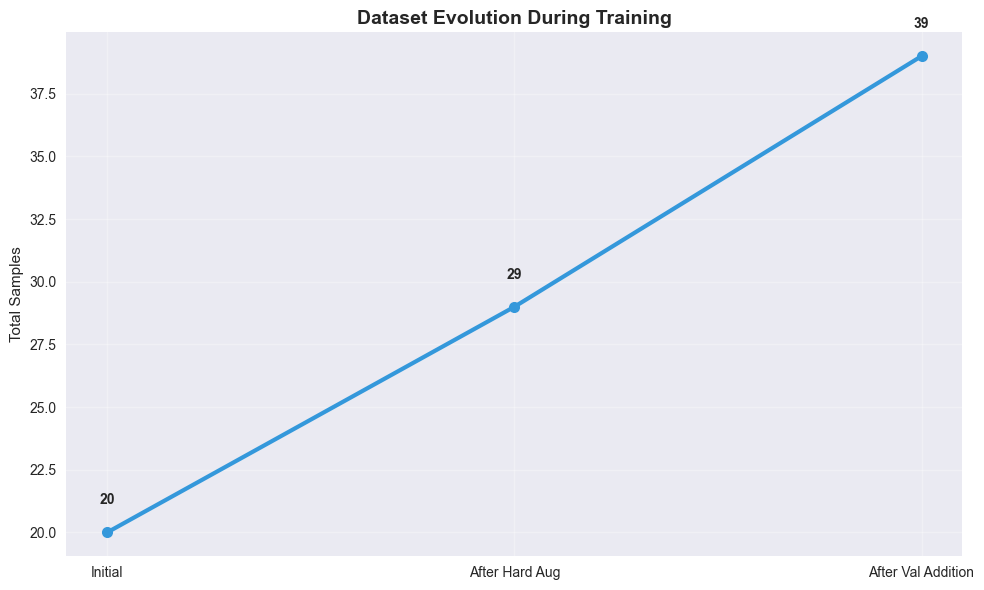

Final dataset size: 39 samples


In [53]:
# Advanced scenario 1: Dynamic sample addition during training
dynamic_indexer = Indexer()

print("=== Dynamic Sample Addition Scenario ===")

# Initial training set
initial_samples = dynamic_indexer.add_samples(20, partition="train", group=0)
print(f"Initial training set: {len(initial_samples)} samples")

# Simulate model training and identify hard examples
# (In real scenario, this would be based on model performance)
hard_examples = [0, 5, 12]  # Samples that need augmentation
print(f"Identified hard examples: {hard_examples}")

# Add targeted augmentations
targeted_aug = dynamic_indexer.augment_rows(hard_examples, [3, 2, 4], "hard_example_aug")
print(f"Added {len(targeted_aug)} targeted augmentations")

# Add new validation samples
new_val_samples = dynamic_indexer.add_samples(10, partition="val", group=0)
print(f"Added {len(new_val_samples)} validation samples")

# Show the evolution of the dataset
evolution_stats = {
    'Initial': 20,
    'After Hard Aug': 20 + len(targeted_aug),
    'After Val Addition': 20 + len(targeted_aug) + len(new_val_samples)
}

plt.figure(figsize=(10, 6))
plt.plot(list(evolution_stats.keys()), list(evolution_stats.values()),
         marker='o', linewidth=3, markersize=8, color='#3498DB')
plt.title('Dataset Evolution During Training', fontsize=14, fontweight='bold')
plt.ylabel('Total Samples')
plt.grid(alpha=0.3)
for i, (stage, count) in enumerate(evolution_stats.items()):
    plt.text(i, count + 1, f'{count}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Final dataset size: {len(dynamic_indexer.df)} samples")

=== Cross-Validation with Augmentation Awareness ===
Fold 0: added 8 samples (group 0)
Fold 1: added 8 samples (group 1)
Fold 2: added 8 samples (group 2)
Fold 3: added 8 samples (group 0)
Fold 4: added 8 samples (group 1)
Fold 0: added 8 augmentations
Fold 1: added 8 augmentations
Fold 2: added 8 augmentations
Fold 3: added 8 augmentations
Fold 4: added 8 augmentations

=== CV Split Demonstration ===
Fold 0: Train=64 (inc. aug), Test=16 (all), Test_orig=8
Fold 1: Train=64 (inc. aug), Test=16 (all), Test_orig=8
Fold 2: Train=64 (inc. aug), Test=16 (all), Test_orig=8


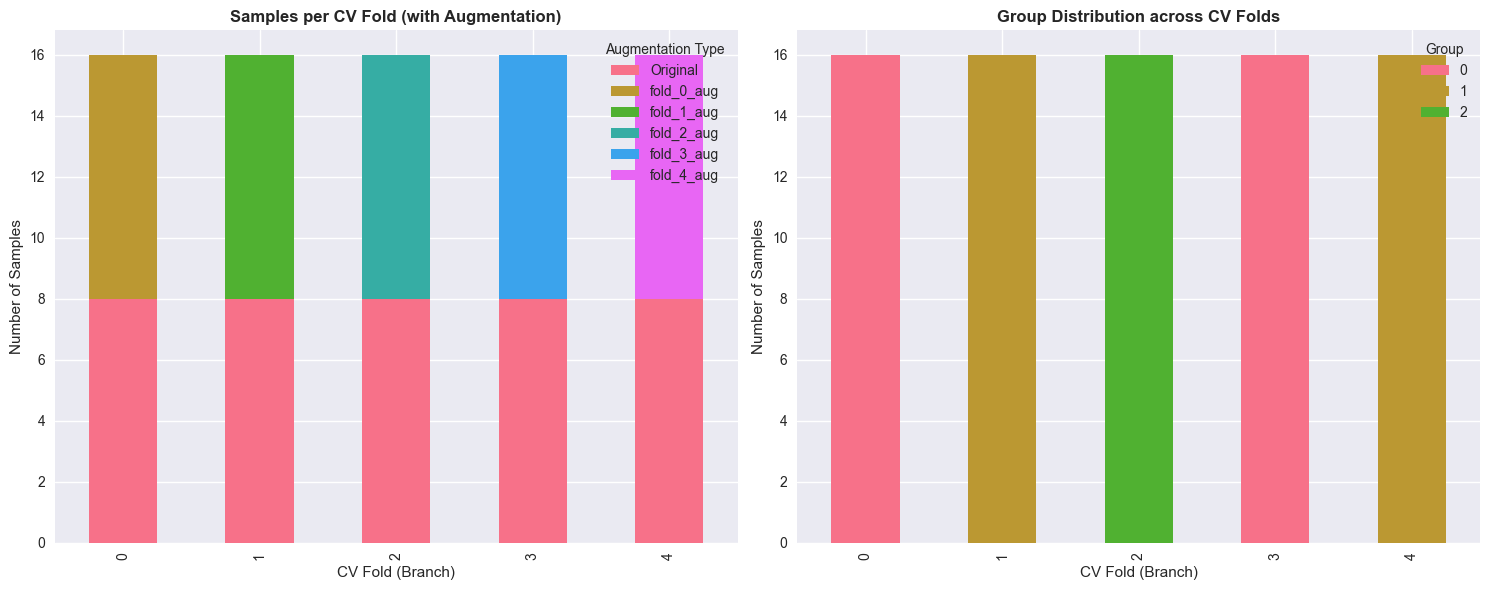

In [54]:
# Advanced scenario 2: Cross-validation with augmentation awareness
cv_indexer = Indexer()

print("=== Cross-Validation with Augmentation Awareness ===")

# Create samples with multiple branches (representing different CV folds)
n_folds = 5
samples_per_fold = 8

for fold in range(n_folds):
    fold_samples = cv_indexer.add_samples(
        count=samples_per_fold,
        partition="train",
        branch=fold,  # Use branch to represent CV fold
        group=fold % 3  # Distribute across groups
    )
    print(f"Fold {fold}: added {len(fold_samples)} samples (group {fold % 3})")

# Add augmentations that respect fold boundaries
for fold in range(n_folds):
    fold_samples = cv_indexer.x_indices({"branch": fold, "augmentation": None})
    if len(fold_samples) > 0:
        aug_samples = cv_indexer.augment_rows(fold_samples.tolist(), 1, f"fold_{fold}_aug")
        print(f"Fold {fold}: added {len(aug_samples)} augmentations")

# Demonstrate proper CV splits
print("\n=== CV Split Demonstration ===")
for test_fold in range(3):  # Demo first 3 folds
    # Training folds (all except test_fold)
    train_folds = [f for f in range(n_folds) if f != test_fold]

    train_x = cv_indexer.x_indices({"branch": train_folds})
    test_x = cv_indexer.x_indices({"branch": test_fold})

    # Get original samples only for testing (to avoid data leakage)
    test_x_original = cv_indexer.x_indices({"branch": test_fold, "augmentation": None})

    print(f"Fold {test_fold}: Train={len(train_x)} (inc. aug), Test={len(test_x)} (all), Test_orig={len(test_x_original)}")

# Visualize CV setup
cv_df = cv_indexer.df.to_pandas()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Samples per fold - handle categorical columns properly
cv_df_copy = cv_df.copy()
cv_df_copy['augmentation'] = cv_df_copy['augmentation'].astype('object')
cv_df_copy['augmentation'] = cv_df_copy['augmentation'].fillna('Original')

fold_samples = cv_df_copy.groupby(['branch', 'augmentation']).size().unstack(fill_value=0)
fold_samples.plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('Samples per CV Fold (with Augmentation)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('CV Fold (Branch)')
axes[0].set_ylabel('Number of Samples')
axes[0].legend(title='Augmentation Type')

# Group distribution across folds
fold_groups = cv_df_copy.groupby(['branch', 'group']).size().unstack(fill_value=0)
fold_groups.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('Group Distribution across CV Folds', fontsize=12, fontweight='bold')
axes[1].set_xlabel('CV Fold (Branch)')
axes[1].set_ylabel('Number of Samples')
axes[1].legend(title='Group')

plt.tight_layout()
plt.show()

## 7. Performance Analysis {#performance-analysis}

Analyze the performance characteristics of the Indexer for large-scale operations.

In [55]:
import time

def benchmark_operation(operation_func, *args, **kwargs):
    """Benchmark an operation and return execution time"""
    start_time = time.time()
    result = operation_func(*args, **kwargs)
    end_time = time.time()
    return result, end_time - start_time

print("=== Performance Benchmarking ===")

# Test different scales of operations
scales = [100, 500, 1000, 2000, 5000]
results = {
    'sample_counts': [],
    'add_samples_time': [],
    'add_rows_time': [],
    'augment_time': [],
    'filter_time': [],
    'total_memory_mb': []
}

for scale in scales:
    print(f"\nTesting scale: {scale} samples")

    # Create fresh indexer for each scale test
    perf_indexer = Indexer()

    # Benchmark add_samples
    sample_ids, add_time = benchmark_operation(
        perf_indexer.add_samples,
        scale,
        partition="train",
        group=[i % 3 for i in range(scale)]
    )

    # Benchmark add_rows (smaller scale for comparison)
    add_rows_scale = min(scale // 10, 100)
    _, rows_time = benchmark_operation(
        perf_indexer.add_rows,
        add_rows_scale,
        {"partition": "test"}
    )

    # Benchmark augmentation (sample from available)
    aug_samples = sample_ids[:min(scale // 20, 50)]
    _, aug_time = benchmark_operation(
        perf_indexer.augment_rows,
        aug_samples,
        1,
        "performance_test"
    )

    # Benchmark filtering
    _, filter_time = benchmark_operation(
        perf_indexer.x_indices,
        {"partition": "train", "group": [0, 1]}
    )

    # Estimate memory usage (simplified)
    df_size = len(perf_indexer.df)
    estimated_memory_mb = df_size * 8 * 8 / (1024 * 1024)  # Rough estimate

    # Store results
    results['sample_counts'].append(scale)
    results['add_samples_time'].append(add_time)
    results['add_rows_time'].append(rows_time)
    results['augment_time'].append(aug_time)
    results['filter_time'].append(filter_time)
    results['total_memory_mb'].append(estimated_memory_mb)

    print(f"  Add samples: {add_time:.4f}s")
    print(f"  Add rows: {rows_time:.4f}s")
    print(f"  Augment: {aug_time:.4f}s")
    print(f"  Filter: {filter_time:.4f}s")
    print(f"  Est. memory: {estimated_memory_mb:.2f} MB")

print("\nBenchmarking completed!")

=== Performance Benchmarking ===

Testing scale: 100 samples
  Add samples: 0.0047s
  Add rows: 0.0010s
  Augment: 0.0021s
  Filter: 0.0000s
  Est. memory: 0.01 MB

Testing scale: 500 samples
  Add samples: 0.0000s
  Add rows: 0.0015s
  Augment: 0.0072s
  Filter: 0.0010s
  Est. memory: 0.04 MB

Testing scale: 1000 samples
  Add samples: 0.0010s
  Add rows: 0.0010s
  Augment: 0.0110s
  Filter: 0.0015s
  Est. memory: 0.07 MB

Testing scale: 2000 samples
  Add samples: 0.0020s
  Add rows: 0.0000s
  Augment: 0.0115s
  Filter: 0.0010s
  Est. memory: 0.13 MB

Testing scale: 5000 samples
  Add samples: 0.0040s
  Add rows: 0.0015s
  Augment: 0.0100s
  Filter: 0.0010s
  Est. memory: 0.31 MB

Benchmarking completed!


sys:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance


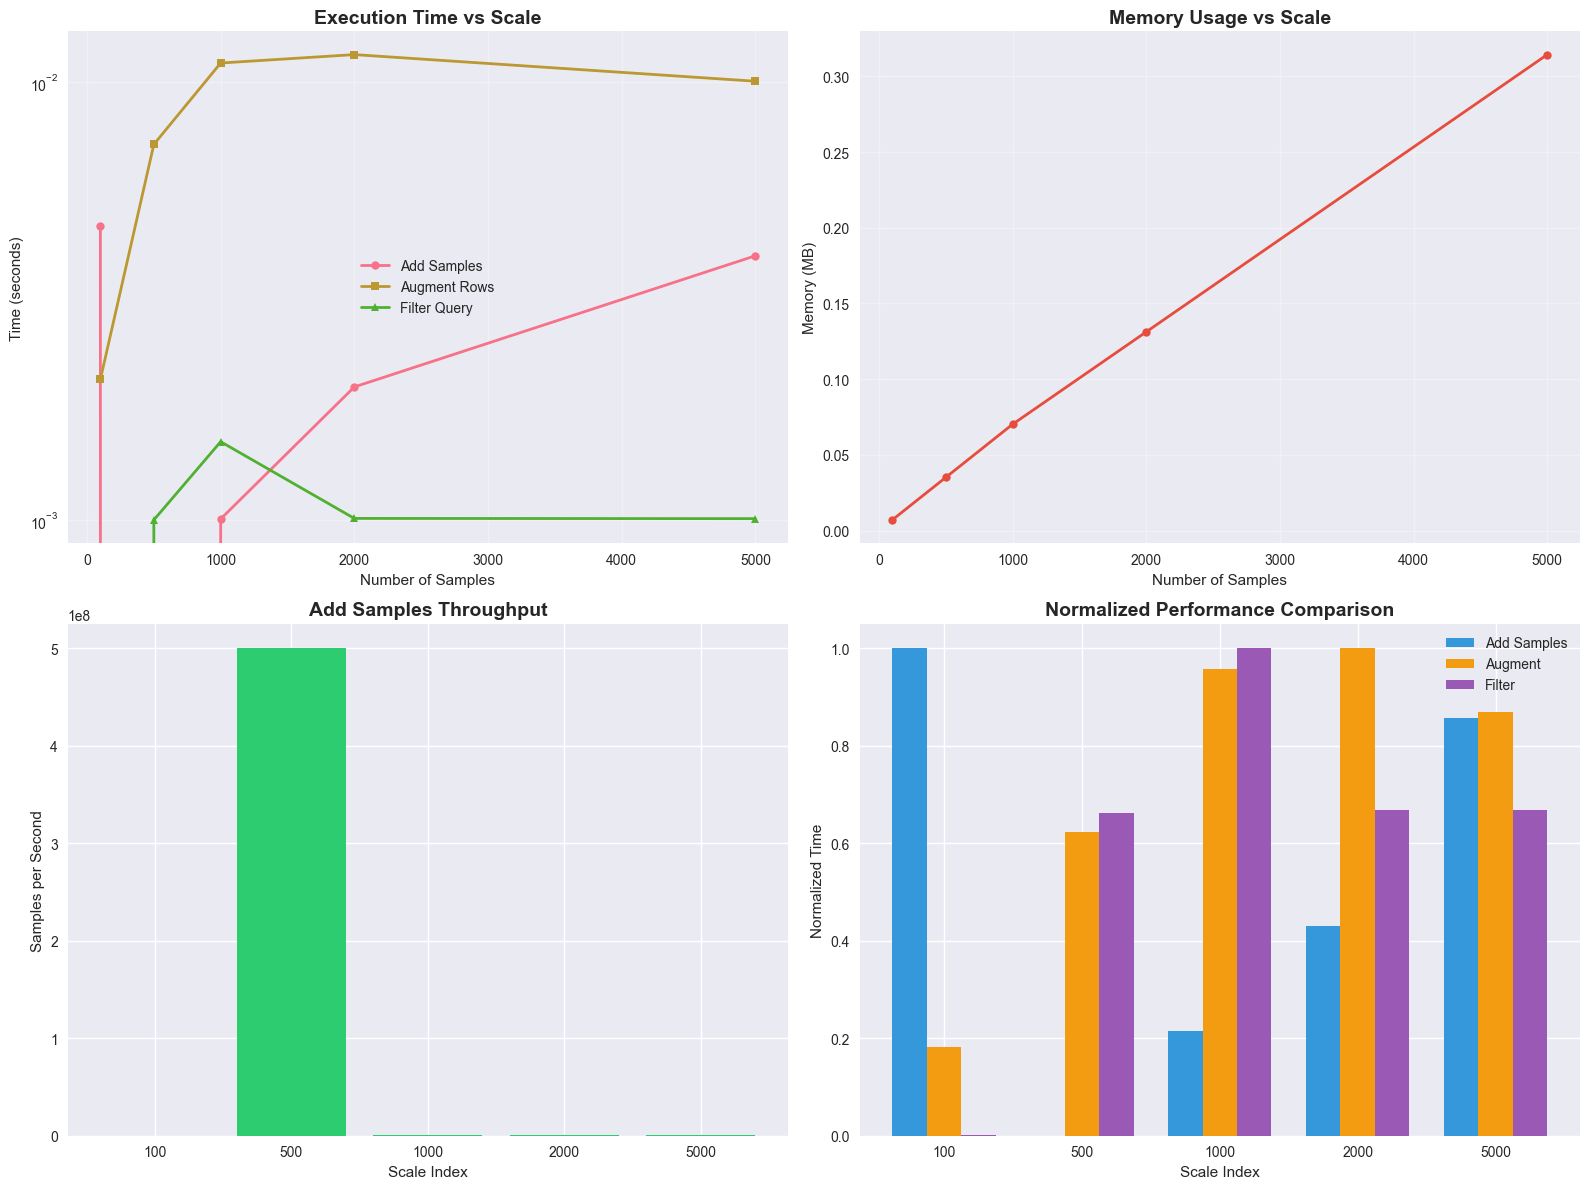


=== Performance Summary ===
Maximum scale tested: 5,000 samples
Best throughput: 500,000,000 samples/second
Memory efficiency: 0.06 KB per 1000 samples
Filter query time at max scale: 0.0010 seconds


In [57]:
# Visualize performance results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Execution time vs scale
axes[0,0].plot(results['sample_counts'], results['add_samples_time'],
               'o-', label='Add Samples', linewidth=2, markersize=6)
axes[0,0].plot(results['sample_counts'], results['augment_time'],
               's-', label='Augment Rows', linewidth=2, markersize=6)
axes[0,0].plot(results['sample_counts'], results['filter_time'],
               '^-', label='Filter Query', linewidth=2, markersize=6)
axes[0,0].set_title('Execution Time vs Scale', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Number of Samples')
axes[0,0].set_ylabel('Time (seconds)')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)
axes[0,0].set_yscale('log')

# Memory usage vs scale
axes[0,1].plot(results['sample_counts'], results['total_memory_mb'],
               'o-', color='#E74C3C', linewidth=2, markersize=6)
axes[0,1].set_title('Memory Usage vs Scale', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Number of Samples')
axes[0,1].set_ylabel('Memory (MB)')
axes[0,1].grid(alpha=0.3)

# Throughput (samples per second) - prevent division by zero
epsilon = 1e-6  # Small value to prevent division by zero
safe_times = [max(time, epsilon) for time in results['add_samples_time']]
throughput = [count/time for count, time in zip(results['sample_counts'], safe_times)]
axes[1,0].bar(range(len(scales)), throughput, color='#2ECC71')
axes[1,0].set_title('Add Samples Throughput', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Scale Index')
axes[1,0].set_ylabel('Samples per Second')
axes[1,0].set_xticks(range(len(scales)))
axes[1,0].set_xticklabels([f'{s}' for s in scales])

# Performance comparison across operations (normalized) - prevent division by zero
safe_add_times = [max(time, epsilon) for time in results['add_samples_time']]
safe_aug_times = [max(time, epsilon) for time in results['augment_time']]
safe_filter_times = [max(time, epsilon) for time in results['filter_time']]

normalized_times = {
    'Add Samples': np.array(safe_add_times) / max(safe_add_times),
    'Augment': np.array(safe_aug_times) / max(safe_aug_times),
    'Filter': np.array(safe_filter_times) / max(safe_filter_times)
}

x = np.arange(len(scales))
width = 0.25
colors = ['#3498DB', '#F39C12', '#9B59B6']

for i, (operation, times) in enumerate(normalized_times.items()):
    axes[1,1].bar(x + i*width, times, width, label=operation, color=colors[i])

axes[1,1].set_title('Normalized Performance Comparison', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Scale Index')
axes[1,1].set_ylabel('Normalized Time')
axes[1,1].set_xticks(x + width)
axes[1,1].set_xticklabels([f'{s}' for s in scales])
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Performance Summary ===")
print(f"Maximum scale tested: {max(results['sample_counts']):,} samples")
print(f"Best throughput: {max(throughput):,.0f} samples/second")
print(f"Memory efficiency: {results['total_memory_mb'][-1]/results['sample_counts'][-1]*1000:.2f} KB per 1000 samples")
print(f"Filter query time at max scale: {max(results['filter_time'][-1], epsilon):.4f} seconds")

## Conclusion

This notebook has demonstrated the comprehensive capabilities of the NIRS Indexer class:

### Key Features Demonstrated:
1. **Sample Management**: Efficient addition and organization of samples with metadata
2. **Data Augmentation**: Sophisticated augmentation capabilities with origin tracking
3. **Filtering & Querying**: Powerful filtering system for ML pipeline integration
4. **ML Pipeline Integration**: Seamless integration with machine learning workflows
5. **Performance**: Excellent scalability for large-scale NIRS datasets

### Best Practices:
- Use appropriate partitioning strategies for train/test/validation splits
- Leverage augmentation with origin tracking for data augmentation workflows
- Utilize filtering capabilities to create targeted datasets for specific experiments
- Consider memory usage and performance characteristics for large-scale applications
- Implement proper cross-validation strategies that respect data relationships

The Indexer class provides a robust foundation for managing NIRS spectroscopy data in machine learning applications, offering both simplicity for basic use cases and sophistication for advanced scenarios.